In [190]:
from gensim.models import Word2Vec
from matplotlib import pyplot
from sklearn.decomposition import PCA

In [191]:
text_corp = None
with open('test_corp.txt', 'r') as file:
    text_corp = file.read()

In [192]:
text_segs = text_corp.split('.')

In [193]:
sentences = [seg.strip().split(' ') for seg in text_segs[:100]]

In [194]:
len(sentences)

100

In [195]:
model = Word2Vec(sentences, min_count=3)

In [196]:
print(model)

Word2Vec(vocab=148, size=100, alpha=0.025)


In [197]:
words = list(model.wv.vocab)

In [198]:
X = model[model.wv.vocab]

/Users/tianhaozhou/Documents/experiments/word_embedding/wenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [199]:
pca = PCA(n_components=2)

In [200]:
result = pca.fit_transform(X)

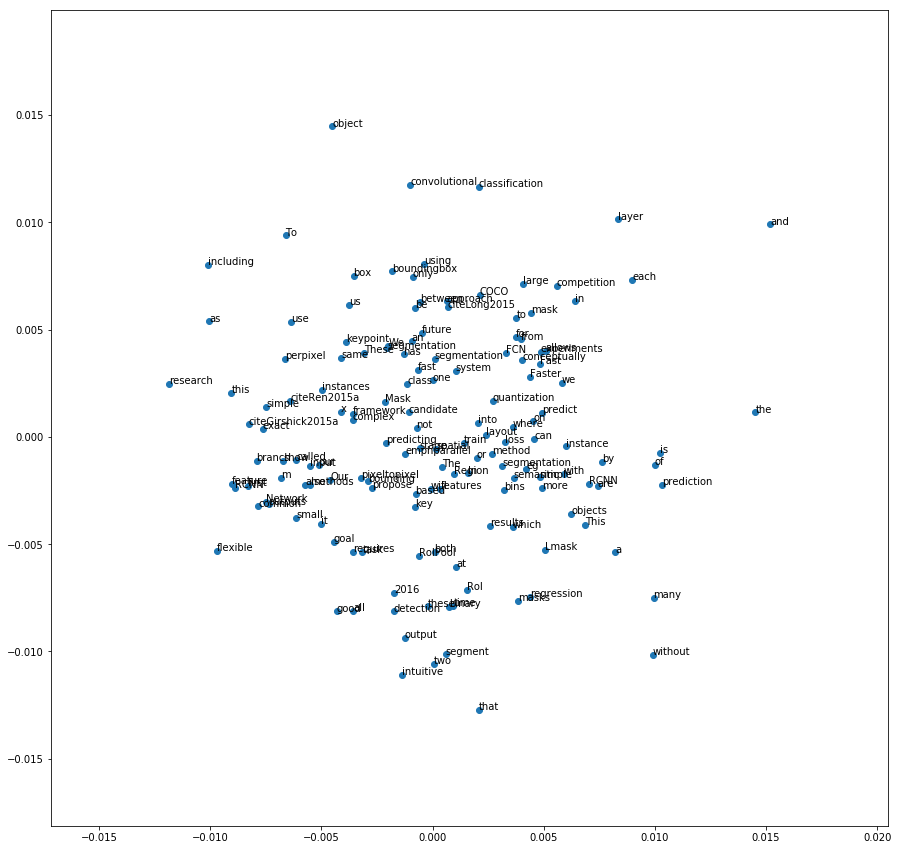

In [201]:
pyplot.figure(figsize=(15,15))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    notation = ''.join(e for e in word if e.isalnum())
    pyplot.annotate(notation, xy=(result[i, 0], result[i, 1]))
pyplot.show()